# Lab 2: X-Ray Fluorescence
In this lab you will be introduced to the non-destructive chemical analysis technique known as X-ray Fluorescence (XRF).You'll use the XEPOS XRF we have at Wellesley to determine chemical composition and look for contaminents in semiconductor materials. By the end of this lab you should be able to:
* Communicate the utility and limits of XRF.
* Interpret an XRF spectra to determine the chemical make up of a sample.  
* Employ XRF data to monitor a chemical deposition process.
* Use python for basic plotting and analysis of XRF data. 

## 1    Get Ready
### 1.1 X-Ray Flouresence Background
XRF is a chemical analysis technique that leverages that different elements have different characteristc transitions between their atomic orbitals. By sending in X-ray raditaion, an XRF ejects a core electron from an atom. These vacancies are then quickly filled by electrons dropping down from higher energies, and charateristic X-rays are emitted in the process. The result is an XRF spectra that will look something like this: 

![XRF Schematic (from hyperphysics)](Lab2/chxray.png)

The use of XRF has a chemical analysis tool involves identifying characteristic X-rays (i.e. what element do they correspond to) and then relating the intensity of those peaks to amount of that given element in the material. With appropriate callibration XRF can detect elements in a material at parts per million concentrations. 

To identify charaterstic X-rays requires some comfort with the labeling of X-ray transitions. The labeling convention for an electron transition between atomic orbitals is: (shell the electron ends in)(the number of shells away the electron started in). For example, the Kα peak above describes the X-ray emitted when an electron falls into the K (or n=1) shell from the n=2 shell (one shell away, signified by α). Example transitions are shown here:

![XRF Transitions (from OpenStax)](Lab2/trxray.png)

### 1.3 Equipment
For this lab we will be using the XEPOS spectrometer. 

![XEPOS Spectrometer](Lab2/XEPOS.png)
Details on how to operate the spectrometer can be found here: https://docs.google.com/document/d/1o7kFTP5TC7huZ-GxAZT0z74ny6zA_-zQCY02L5TEt8w/edit?usp=sharing

Please review these instructions before using the XEPOS and be sure to follow them whenever collecting data.

### 1.2 X-Ray Flouresence Data
Before we dig into the exercises we will do a quick overview on common features of an XRF spectra. Here is an example of a spectra I toon on the XEPOS instrument: 

![XRF Spectra](lab2/XRFdata.png)

You'll notice there are several interesting features in this spectra, not all of which are related to our sample. 

* Bremsstrahlung Radiation: This is secondary radiation from our sample. We use X-rays to kick off electrons from our sample, but those electrons will give off their own radiation as they are being acceleratred around the chamber. We'll often observe as low and wide preak that contributes to our background radiation.

* Rayleigh Scattering: This is elastic scatterning (no loss in energy) between our X-rays and our sample and will be charatersistic of our excitation source. In this case our X-rays are generated from a Pd/Co target so peaks related to those elements are likely effects of elastic scattering.

* Compton Scattering: This is inelastic scattering between our X-rays and our sample. Since some energy is lost in the transistion this peak will appear at lower energy than our elastic scatting peak, and will generally be broader since the amount of energy loss varies with the angle of collision.

* Instrumental Artifacts: The XEPOS uses a series of filters to get better resolution in various parts of the energy scale. The materials that these filters are made of (in this case Aluminum) can also show up in our spectra.


## 2    Exercises
With that introduction let's analyze some XRF data. For XRF to be a quantitative tool requires a set of standards to understand how intensity relates to chemical composition. The reason for this is that a lot of things impact emitted X-ray intensity varying from the elemental chemistry (e.g. heavy atoms scatter more than light ones), the matrix an element is in (e.g. Cd in Au vs. Cd in Si), and the amount of material you have. We do not have standards for the experiments we will be doing today, however even without them we can learn about the elemental composition of our samples and use relative peak heights to argue if there is say more of element A in sample 1 or sample 2. 

### 2.1 Characterize the III-V
In our first exercise you are going to solve a puzzle - what semiconductors did Becky buy off of eBay? This is a question I tackled this summer and I even used XRF data to get some money back from an eBay seller when the description of what they sold me didn't match the XRF. 

You are going answer this question by workign with your team to analyze XRF spectra of three III-V semiconductors. III-V semiconductors are so named because they are synthesized from elements in column III (B, Al, Ga, In) covalently bonded to elements in column V (N, P, As, Sb). These semiconductors are extremely high performing materials that are commonly used in super-high efficiency solar cells (the type we use on satellites where efficiency is much more important than cost) as well in lasers. By changing the composition of the III-V (e.g. AlP vs. GaAs vs. AlxGa(1-x)As) you can greatly change its optoelectronic properties, so knowing the chemistry is extremely important.   

### 2.1.1 Import and Plot an XRF 
Our first step in analysis is to look at our data

In [1]:
#   We'll being by importing the required packages
import pandas as pd #This is a package that is helpful when working with big data sets
import numpy as np  #This is a package that is very helpful when working with arrays of numbers
import matplotlib.pyplot as plt #We will use this for plotting.

(5.0, 15.0)

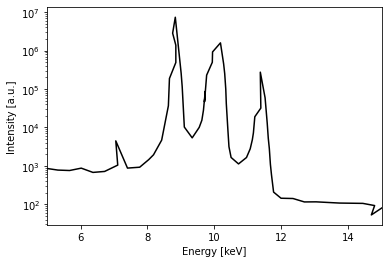

In [17]:
#   Now we'll import the data 
#   xrf_data will be a 2D array where the first column corresponds to energy and the second
#   column is counts on the detectors

#TODO Update this code to open a file of interest, have each member of your team open a different file if possible  
xrf_data = np.array(pd.read_csv('Lab2/IIIV_2.csv')) #This takes a csv, reads it in to python and then makes it a numpy array

#TODO Plot your XRF spectra on a semilog plot (log on the y axis)
plt.semilogy(xrf_data[:,0],xrf_data[:,1],'k')
plt.xlabel('Energy [keV]')
plt.ylabel('Intensity [a.u.]')
plt.xlim(5,15)

Save your plot to your notesheet <font color='red'>(answer 1)

### 2.1.2 Make a Peak List
For many applications it's helpful to identify the location and intensity of peaks. We'll apply that to our XRF data here.

Note: Like with all things in coding, this one way to approach this problem, not the only way

In [4]:
#   We'll use some definitions to solve this problem
#   Be sure you understand what these definitions do before you use them

def find_nearest(array, value):
    #array is a 1D vector
    #value is the specific value for which want the index
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def trim_data(x, data, limit1, limit2):
    #x is a 1D array of energies
    #data is an array of  intensities
    #limit1 and limit2 are what you'd like to trim your data to 
    test = np.array(x)
    set1 = find_nearest(test,limit1)
    set2 = find_nearest(test,limit2)
    return x[set1:set2], data[set1:set2]

def findmax_inrange(x,data,limit1,limit2):
    #x is a 1D array of energies
    #data is an array of  intensities
    #limit1 and limit2 are what you'd like to trim your data to 
    set1 = find_nearest(x,limit1)
    set2 = find_nearest(x,limit2)
    max_int = np.max(data[set1:set2])
    max_energy = x[find_nearest(data,max_int)]
    return max_energy, max_int

(7.053259968983025, 4484.681789282865)
(8.830660066707738, 7392280.501423523)
(10.179579783730958, 1592165.1646738343)
(11.36980306345733, 275386.11378972)
(18.288967729599968, 5105.27484678459)
(19.622017802893502, 2779.0789451286746)
(24.08138769093497, 461455.51023100334)


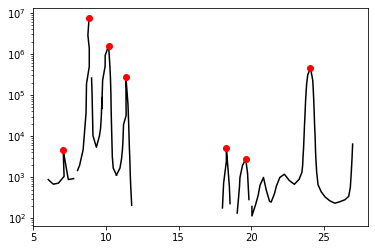

In [19]:
#   My approach is to search for the maxmimum in a specific energy range. 
#   Guided by my plot, I am going to pick energy ranges where there exists one peak
#   I can then apply my above definitions to find the energy of max intensity 
#   (a.k.a. my charatersitc energies) and it's associated intensity
#   I'll also use plotting here to make sure no funny business is happening
peak_list = []
#   Set domain of interest

energy_limits = [[6,8],[8,9],[9,11],[10.75,12], [18,18.75], [19,20],[20,27]]

for each in energy_limits:

    #   Find max
    peak = findmax_inrange(xrf_data[:,0],xrf_data[:,1],each[0],each[1]) #use definition with values of interest

    #   Plot range of interest and max point to check in on what's happening
    plt_limit1 = find_nearest(xrf_data[:,0],each[0])
    plt_limit2 = find_nearest(xrf_data[:,0],each[1])

    plt.semilogy(xrf_data[plt_limit1:plt_limit2,0],xrf_data[plt_limit1:plt_limit2,1],'k')
    plt.semilogy(peak[0],peak[1],'ro')

    print(peak)
    peak_list.append(peak[0])

#TODO Store energies and intensities for peaks in a list
#TODO Update the above code to identify peaks in your XRF spectra

Save your peak list in your notesheet <font color='red'>(answer 2)
1. Cobalt KL1
2. GaAs KL1
3. As KL1
4. As KL3
5. In KL2

#Notes focus just on peaks from III-V, account for wiggle room due to imperfrections in data


### 2.1.3 Indentify your Peaks
Now that you have your peaks identified you can determine what your semiconductors are. Compare your peak energies to charatersitic transitions for III-V compounds. Using the charatersitic energy table supplied by NIST (https://physics.nist.gov/PhysRefData/XrayTrans/Html/search.html) identify and label the transitions in your XRF spectra. 

Upload your annotated peak list or spectra to your note sheet <font color='red'>(answer 3)

### 2.1.4 Compare
Now you can compare spectra and guess at composition. Comparing your peak lists, what differences do you notice across the samples. Are there different elements present? Different relative concentrations? 

To compare relative concentraions you can normalize all of your intensities to one element, for instance the intensity of a galium peak, and compare. Doing this will put your intensities into the world of relative intesnsities from which you can make conclusions (e.g Tianna's data shows an aluminum peak that is .25X the intensity of her galium peak, while Karla's data has an aluminum and galium peak with approximately the same intensity. This suggests Karla's sample has a higher Al to Ga ratio).   

As a team discuss your data, and report out your observations and best guesses at III-V composition in your notesheet. <font color='red'>(answer 4)

## 2.2 Search for Copper Contaminents 
Now that we're familiar with the basics of XRF data and analysis let's look at the samples you all made. You all took bulk copper, evaporated it, and then annealed it to form a copper oxide. Along the way it's possible some contaminents were incorporated into your sample. 

In this exercise you are going to compate the XRF spectra of bulk copper and our glass substrates to that of your evaporated samples to see if there are elemental contaminents in your samples. 

### 2.2.1 Collect XRF Data of Your Samples
Travel with Becky to the XEPOS lab! We'll walk through how to use the XEPOS and will collect data on your samples. 

### 2.2.2 Make a Comparitive XRF Plot  
Adapt the above code to import and plot three XRF spectra: the copper, the glass, and one of your copper samples.

Upload your plot to your notesheet <font color='red'>(answer 5)

(2.5, 10.0)

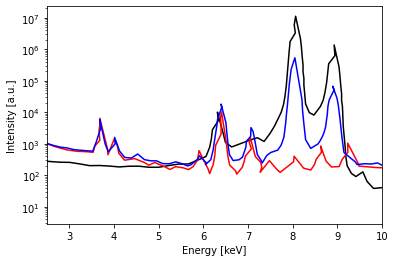

In [21]:
#   Plot everything
xrf_cu = np.array(pd.read_csv('Lab2/copper.csv')) #This takes a csv, reads it in to python and then makes it a numpy array
xrf_glass = np.array(pd.read_csv('Lab2/glass.csv')) #This takes a csv, reads it in to python and then makes it a numpy array
xrf_cuo = np.array(pd.read_csv('Lab2/copper_oxide.csv')) #This takes a csv, reads it in to python and then makes it a numpy array

#TODO Plot your XRF spectra on a semilog plot (log on the y axis)
plt.semilogy(xrf_cu[:,0],xrf_cu[:,1],'k')
plt.semilogy(xrf_glass[:,0],xrf_glass[:,1],'r')
plt.semilogy(xrf_cuo[:,0],xrf_cuo[:,1],'b')
plt.xlabel('Energy [keV]')
plt.ylabel('Intensity [a.u.]')
plt.xlim(2.5,10)


### 2.2.3 Identify Contaminents (and Copper)
Using your comparative plot, identify if there any peaks present in you sample that are not in the underlying substrate or originally present in the copper film. If so, determine their energy and their chemistry. 

Report out on your contaminent search on your notesheet <font color='red'>(answer 6)

Also, since we're working with the fundamental assumption that your films contain copper, confirm its presence in your films by identifying the charateristic transitions related to copper. Label these transitions on your spectra  <font color='red'>(answer 7)

## <font color='pink'>Upload a copy of your notesheet with answers 1 through 7 to the Google Drive